#### Tuning Random Forest

#### Initialising Dataset

First we load in the pre-processed dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import ValidationCurveDisplay
import numpy as np
from sklearn.model_selection import GridSearchCV
import time

# Read in csv
data = pd.read_csv('data/diabetic_data_formatted.csv')


# Remove the columns that have ~0.5 or more '?'
data.drop(['weight', 'medical_specialty'], axis=1, inplace=True)

# Replace <30 or >30 days readmission to YES
data['readmitted'] = data['readmitted'].replace(1, 0)
data['readmitted'] = data['readmitted'].replace(0, 0)

# Select target column to predict
X = data.drop(columns=['readmitted'])
y = data['readmitted']


# Get the unique class names from the target variable
class_names = ['YES', 'NO']

# Encode strings to unique integers
le = LabelEncoder()

X_encoded = X
y_encoded = y

#### Finding baseline performance

Next to find the baseline performance of the model we run it without any initalised parameters and use random state 42 to split the dataset into training and testing sets. We also created a function to reduce duplicated code.

In [2]:
# Define the model
Random_Forest_model = RandomForestClassifier()

def getResults(model):

    # start timing the model
    start = time.time()
    
    # Define GridSearchCV parameter grid
    param_grid = Random_Forest_model.get_params()

    print(param_grid)

    for key in param_grid:
        param_grid[key] = [param_grid[key]]
    
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, random_state=42)

    
    # Implement GridSearchCV for SVC
    grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Predict using the best model
    y_pred = best_model.predict(X_test)

    
    # Evaluate accuracy

    print('\nCross validated score using 4 folds:')
        
    print('\n Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    

    # Evaluate precision
    print('\n Precision: %.2f' % precision_score(y_test, y_pred, average='macro'))

    
    # Evaluate Recall
    print('\n Recall: %.2f' % recall_score(y_test, y_pred, average='macro'))

    
    # Evaluate f1
    print('\n f1: %.2f' % f1_score(y_test, y_pred, average='macro'))    


    # stop timing the model
    end = time.time()

    # calcualate total time
    execution_time = end - start
    
    print('\nExecution Time: %.2f' % execution_time + "s")

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 30.50s


Since a grid search did not finish executing for a simple model such as the perceptron, we went straight to modifying the most impactful hyperparameters.

#### Creating a validation curve

Next we created a validation curve procedure to display the change in score as a variable is modified.

In [5]:
def displayValidationCurve(model, p_name, p_range, score):
    disp = ValidationCurveDisplay.from_estimator(
        RandomForestClassifier(),
        X_encoded,
        y_encoded,
        param_name=p_name,
        param_range=p_range,
        score_type="both",
        n_jobs=-1,
        score_name=score,
        cv=4
    )
    disp.ax_.set_title(score + " Validation Curve for Random Forest")
    disp.ax_.set_xlabel(p_name)
    disp.ax_.set_ylim(0.0, 1.1)
    plt.show()

#### Finding the most impactful Random Forest hyperparameters

First we listed the available hyperparameters.

In [29]:
Random_Forest_model=RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    oob_score=False,
    random_state=None,
    n_jobs=None,
    verbose=0,
    warm_start=True,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
);

#### Choosing the most impactful parameters

##### Finding optimum value for n_estimators

We believe that n_estimators would be the most impactful parameter to the accuracy score, this is because as the number of trees increases, the accuracy also increases, as the model is able to account for random noise and predict more precisely.

Testing n_estimators values at 30, 80, 130

In [18]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=30,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
testing model:

Cross validated score using 4 folds:

 Accuracy: 0.63

 Precision: 0.62

 Recall: 0.62

 f1: 0.62

Execution Time: 8.23s


In [3]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 22.49s


In [4]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=130,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 38.53s


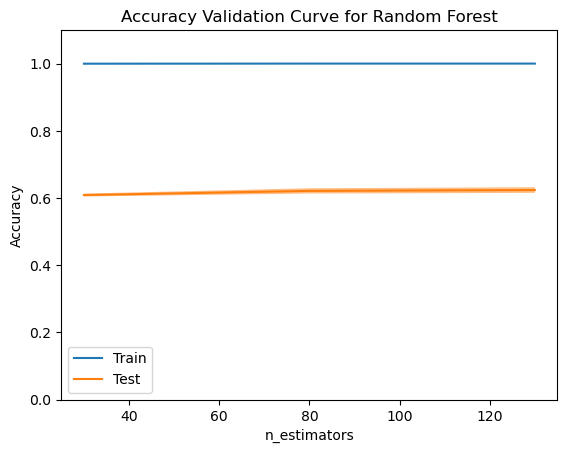

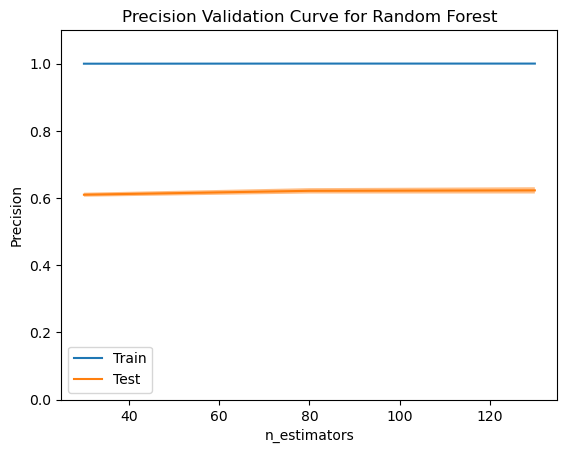

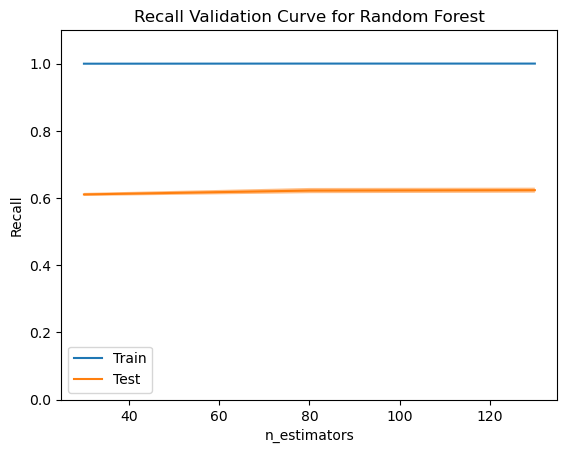

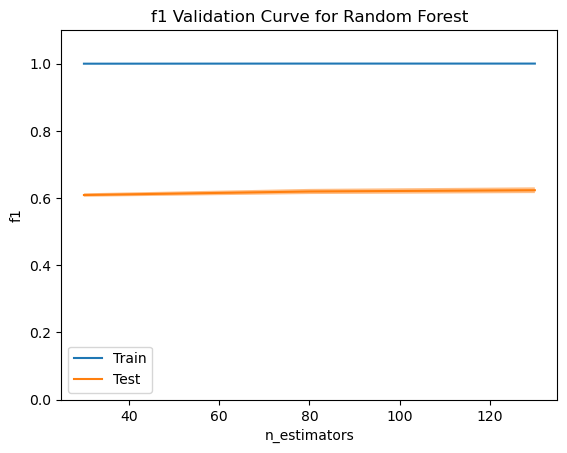

In [6]:
displayValidationCurve(RandomForestClassifier(), "n_estimators", [30, 80, 130], "Accuracy")
displayValidationCurve(RandomForestClassifier(), "n_estimators", [30, 80, 130], "Precision")
displayValidationCurve(RandomForestClassifier(), "n_estimators", [30, 80, 130], "Recall")
displayValidationCurve(RandomForestClassifier(), "n_estimators", [30, 80, 130], "f1")

We found that after 80 iterations the model does not improve in accuracy score and only increases computation time, so the best parameter for n_estimators is 80.

##### Finding optimum value for criterion

We decided that modifying the criterion might lead to an increase in accuracy score, this is because Gini often computes in a quicker time as it uses more splits, entropy is more conservative with its splits meaning it can make better decisions and gain a higher accuracy score at the cost of increased computation time.

Testing criterion values 'gini' and 'entropy'

In [5]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',    
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 22.30s


In [6]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='entropy',    
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 24.21s


Curve was not plotted for criterion, since they we text fields they were not added to the x-axis, a broken graph was displayed on screen.

We saw no performance gain when changing the criterion. We selected 'gini' as it is less computationally expensive than 'entropy' running 1.91s faster.

##### Finding optimum value for max_depth

To improve accuracy performance we chose to modify the max_depth parameter. This is because deep trees can lead to overfitting and with the default parameter set to None, it is likely that this was occuring. Also in the event of no increase in accuracy score we could at least improve training speed as trees that have lower depth can be computed in less time.

Testing criterion values 10, 20, 50

In [8]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=10,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 11.90s


In [9]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=20,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 18.63s


In [10]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 22.95s


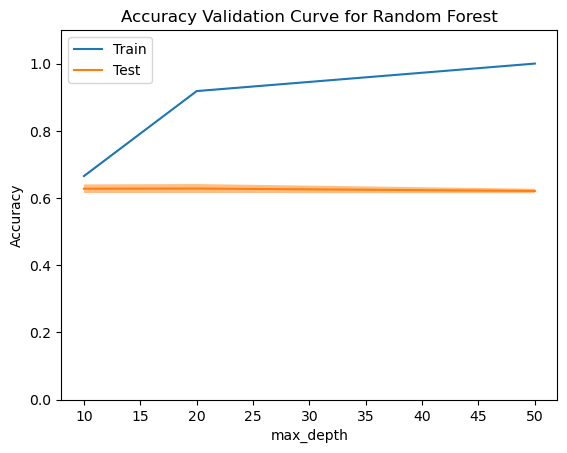

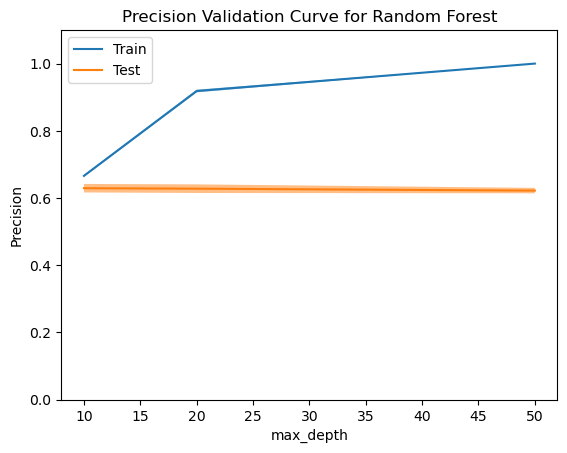

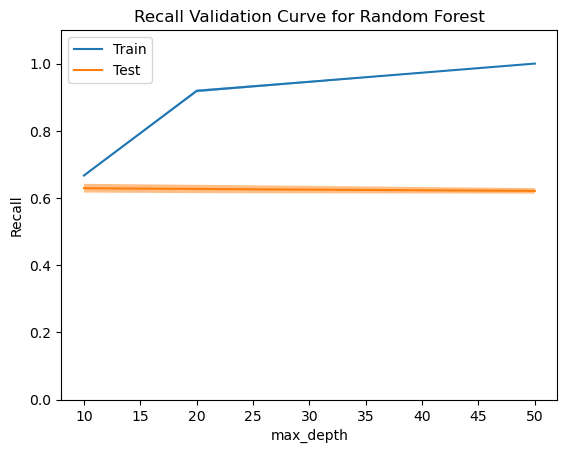

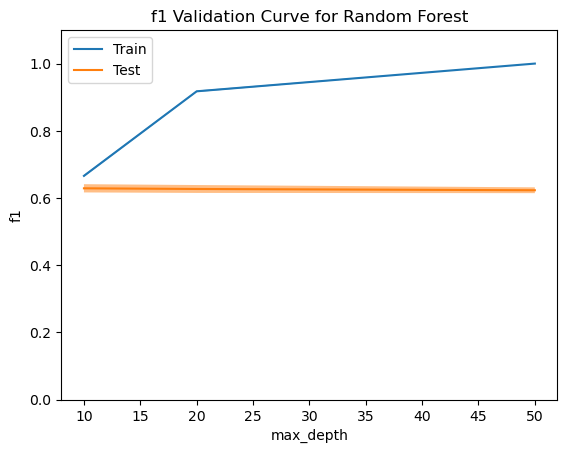

In [7]:
displayValidationCurve(RandomForestClassifier(n_estimators=80, criterion='gini'), "max_depth", [10, 20, 50], "Accuracy")
displayValidationCurve(RandomForestClassifier(n_estimators=80, criterion='gini'), "max_depth", [10, 20, 50], "Precision")
displayValidationCurve(RandomForestClassifier(n_estimators=80, criterion='gini'), "max_depth", [10, 20, 50], "Recall")
displayValidationCurve(RandomForestClassifier(n_estimators=80, criterion='gini'), "max_depth", [10, 20, 50], "f1")

With all variations of depth values the test accuracy stayed the same at 0.64. Since there is no change in test accuracy, we can set the max depth to 10 to avoid overfitting and so that the model is easier to run and takes less computation time at 11.90 seconds.

#### Justifying selection for other parameters

##### Finding optimum value for min_samples_split

The min_samples_split can assit in increasing accuracy, by selecting a lower number of min splits, the tree will grow deeper and find more trends in the data, however this can come at the cost of overfitting if the patterns found are too closely related to the training set.

Testing min_samples_split values at 0.5, 2, 10

In [16]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=10,
    min_samples_split=0.5,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 0.5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.58

 Precision: 0.63

 Recall: 0.56

 f1: 0.50

Execution Time: 2.71s


In [10]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 9.72s


In [12]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=10,
    min_samples_split=10,
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 10.87s


Lowering the min_samples_split to below 2, leads to overfitting of the data and causes the score to drop to 0.53 from 0.64. Increasing the value to greater than 2 does not increase the accuracy further, as expected.

##### Finding optimum value for class_weight

We found that the class was imbalanced when tuning the perceptron, with 7238 more entries for patients who were not readmitted to those that were. So setting the class_weight parameter to balanced should increase accuracy and overall performance of the model.

In [12]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=10,
    class_weight=None
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 11.15s


In [7]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=10,
    class_weight='balanced'
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.63

 f1: 0.63

Execution Time: 23.01s


The accuracy score stayed the same however, this could be because the tree splits data into random sets and then a single tree trains on that specific set, then the accuracy of all trees are averaged. We left the weighting as balanced, since it took less time to execute (0.85s faster).

##### Finding optimum value for min_samples_leaf

During testing we found the min_samples_leaf was correlated to max_depth, increasing max_depth from 10 to 50 caused an increase in accuracy

Testing min_samples_leaf values 1, 10, 20

In [8]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=1
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.63

 Precision: 0.63

 Recall: 0.63

 f1: 0.63

Execution Time: 23.56s


In [9]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=10
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 15.37s


In [14]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.65

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 15.14s


We kept the min_samples_leaf parameter set at 20, as we found an increase of accuracy score from 0.64 to 0.65, as well as a 10.3s decrease in execution time.

##### Finding optimum value for max_features

Testing max_features values 0.5, log, sqrt

In [16]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features=0.5
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 45.59s


In [17]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='log2'
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 11.73s


In [18]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt'
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.65

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 13.25s


Using max_features set to 0.5 lowered the score by 0.01, so we decided to leave it at the default value of sqrt, this allowed us to maintain 0.65 accuracy as well as keep computation time low at 13.25 compared to 45.59s when using 0.5.

##### Justifying value for bootstrap

We set the hyper parameter bootstrap to False, as although it creates randomness as each tree is trained on a different subset of the data, reducing overfitting, the accuracy only decreased from 0.65 to 0.64.

In [23]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.65

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 20.39s


In [24]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = True
)

getResults(Random_Forest_model)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 13.48s


##### Justifying value for verbose

We set Verbose to 0, as we did not require output logs as the model was training.


In [25]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.65

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 20.90s


##### Justifying value for ccp_alpha

We set ccp_alpha to 0.0, to avoid pruning of trees, this allows the trees to grow to their full depth and find trends within the data. 

In [4]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.65

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 21.27s


##### Justifying value for max_leaf_nodes

We set max_leaf_nodes was to None, this allows the tree to have an unlimited number of nodes so that it is not constrained when growing and can improve model accuracy. 

In [3]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 21.87s


##### Justifying value for max_samples

We set max_samples was to None, so that the model can utilise the entire data set when training and therefore reduce under fitting.

In [8]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None,
    max_samples=None
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.65

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 23.52s


##### Justifying value for min_impurity_decrease

We set min_impurity_decrease to 0.0, this ensures that the impurity is not a factor and the overall model's performance is prioritised. 

In [3]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 21.98s


##### Justifying value for monotonic_cst

We set monotonic_cst was to false as we did not require constraints on the input features and instead wanted the model to find complex patterns in the data. N_jobs was set to None, so that only one CPU core was used, this was done to replicate the lower end machines that hospitals might use. 

In [6]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    monotonic_cst=None
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.65

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 21.84s


##### Justifying value for oob_score

We set oob_score to False as cross validation was already being performed.

In [7]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    monotonic_cst=None,
    oob_score=False
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 20.41s


##### Justifying value for random_state

We set random_state to None , as the grid search cross fold already sets which random state to use, this ensures all models use the same state and the scores are reproducible.

In [9]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    monotonic_cst=None,
    oob_score=False,
    random_state=None
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 19.30s


##### Justifying value for warm_start

We set warm_start to False, to stop the model from reusing previously fitted trees, reducing the chances of over-fitting.

In [10]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    monotonic_cst=None,
    oob_score=False,
    random_state=None,
    warm_start=False
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 19.56s


##### Justifying value for min_samples_split

We set min_samples_split to 2, setting a value lower than 2 caused overfitting.

In [11]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    monotonic_cst=None,
    oob_score=False,
    random_state=None,
    warm_start=False,
    min_samples_split=2
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.64

 Precision: 0.64

 Recall: 0.64

 f1: 0.64

Execution Time: 20.50s


#### Final Parameters for Random Forest

In [14]:
Random_Forest_model = RandomForestClassifier(
    n_estimators=80,
    criterion='gini',
    max_depth=50,
    class_weight='balanced',
    min_samples_leaf=20,
    max_features='sqrt',
    bootstrap = False,
    verbose=0,
    ccp_alpha=0.0,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    monotonic_cst=None,
    oob_score=False,
    random_state=None,
    warm_start=False,
    min_samples_split=2
)

getResults(Random_Forest_model)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Cross validated score using 4 folds:

 Accuracy: 0.65

 Precision: 0.65

 Recall: 0.65

 f1: 0.65

Execution Time: 20.36s
